In [25]:
# YOLO-YOU ONLY LOOK ONCE
# it uses transfer learning backed by CNN.
# used for object detections and image segmentation
#ultralytics - package used for yolo

In [26]:
# pip install ultralytics

In [27]:
import ultralytics
model=ultralytics.YOLO('yolov8n.pt')

Enter your image path: person_bike.jpg

0: 448x640 1 person, 1 bicycle, 218.1ms
Speed: 11.2ms preprocess, 218.1ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


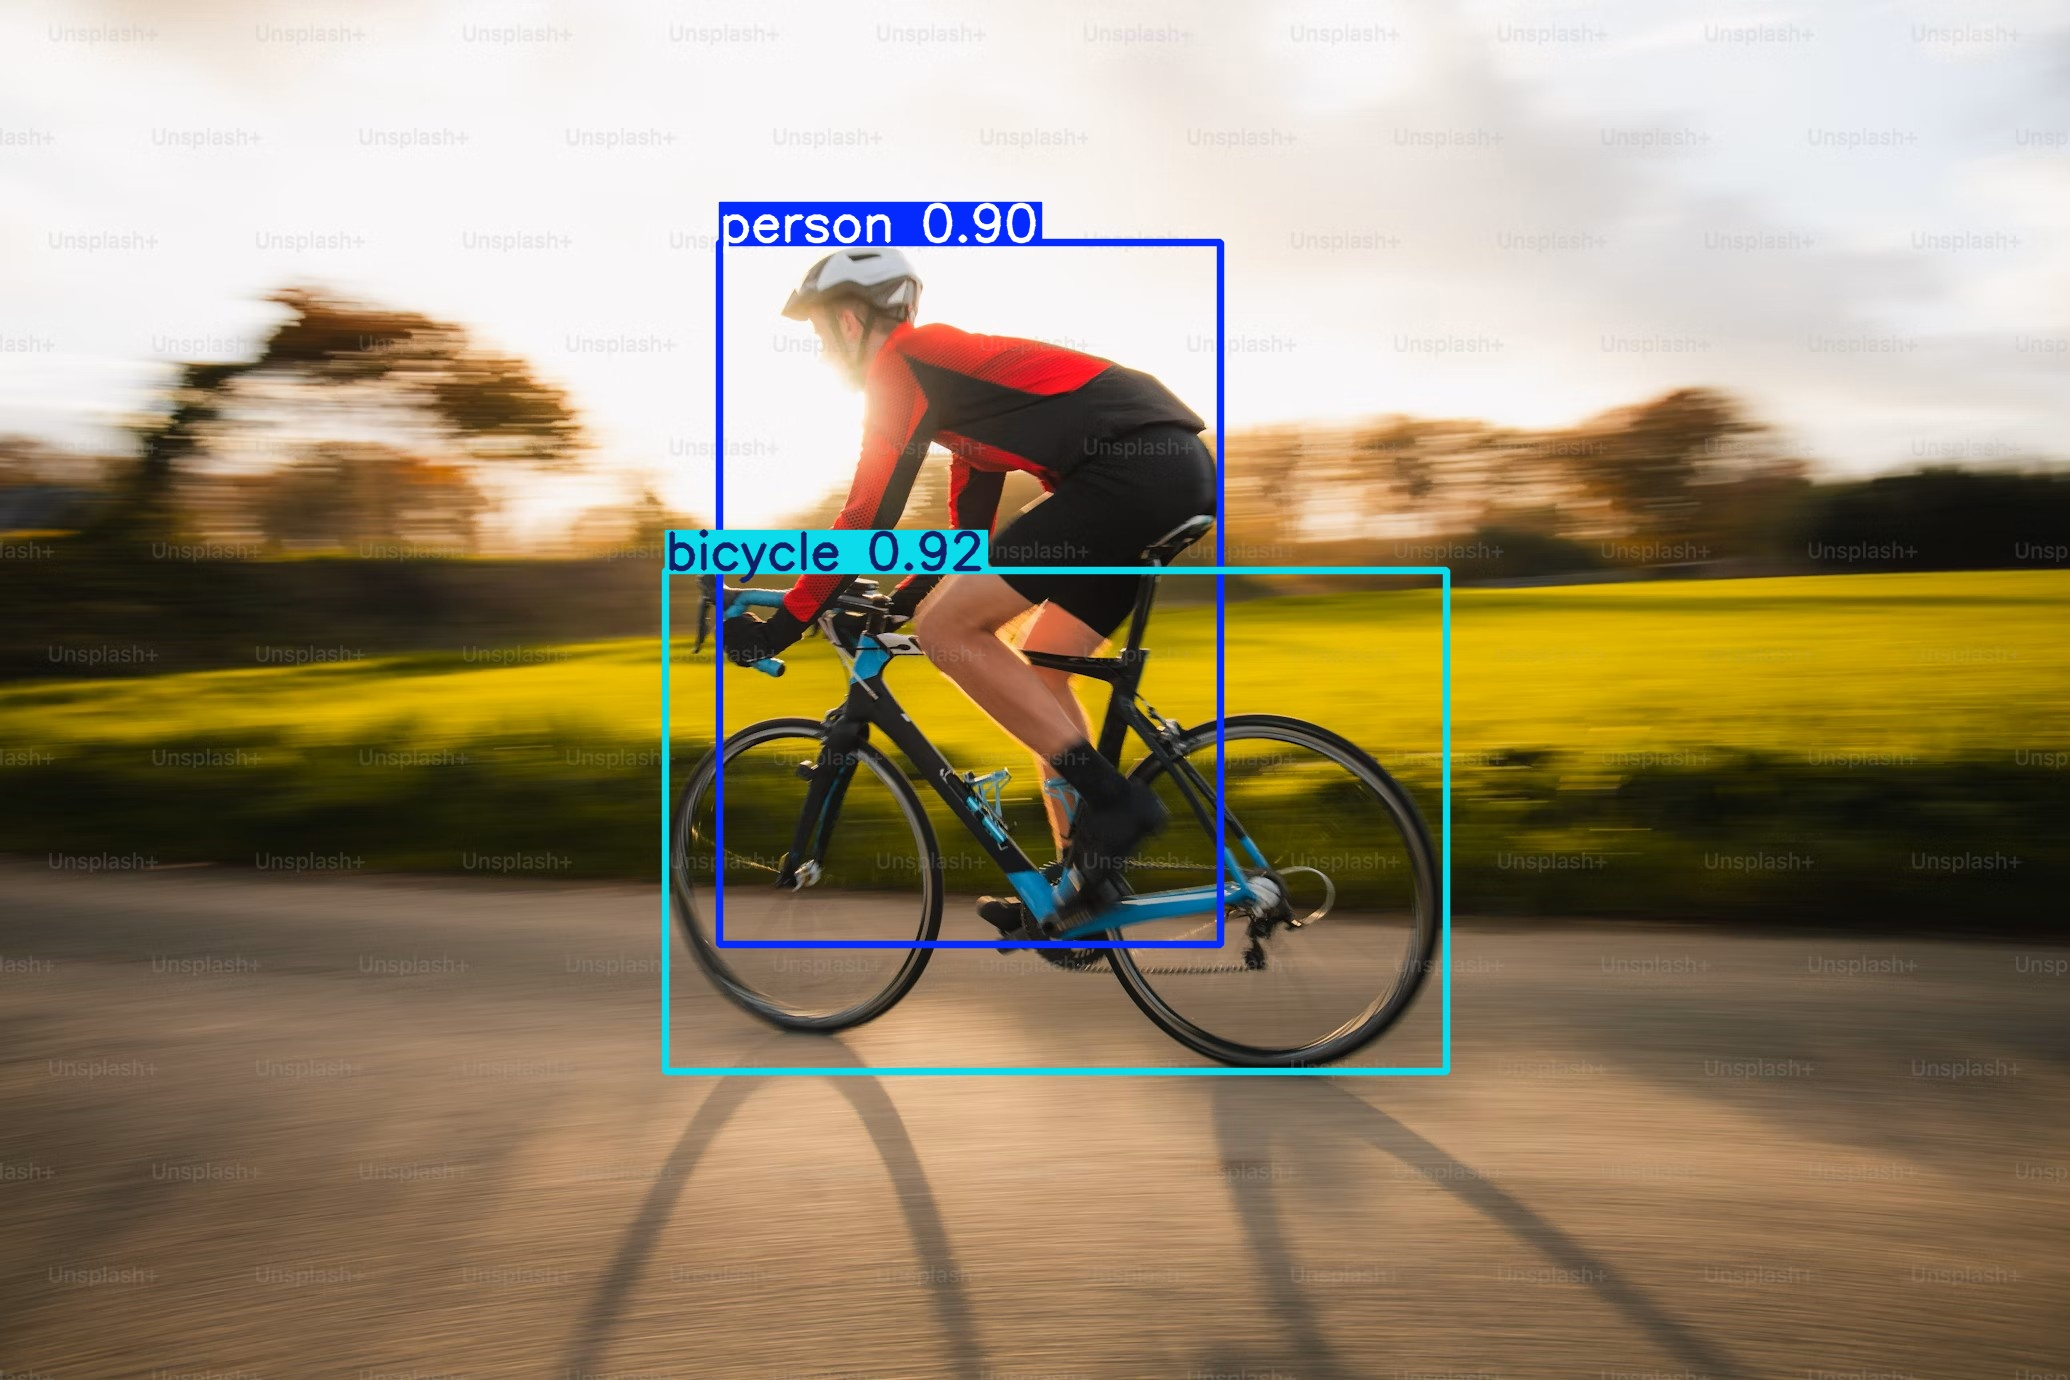

In [28]:
import cv2
from google.colab.patches import cv2_imshow

img = input("Enter your image path: ")
result=model([img])
for i in result:
  i.save(filename='result.jpg')
  img=cv2.imread('result.jpg')
  cv2_imshow(img)

In [29]:
#LLMs

In [30]:
# Parse results
detected_objects = []
for res in result:
    boxes = res.boxes
    for box in boxes:
        cls_id = int(box.cls[0])
        confidence = float(box.conf[0])
        class_name = model.names[cls_id]
        detected_objects.append({
            "name": class_name,
            "confidence": confidence
        })

# Print object names and confidence
for obj in detected_objects:
    print(f"{obj['name']} ({obj['confidence']*100:.1f}%)")

bicycle (91.6%)
person (90.4%)


In [31]:
detected_objects

[{'name': 'bicycle', 'confidence': 0.9160585403442383},
 {'name': 'person', 'confidence': 0.9041689038276672}]

In [32]:
# Accept a text prompt
prompt = input("Enter a text prompt related to the image: ")


Enter a text prompt related to the image: what is the person doing?


In [33]:
from transformers import pipeline

# Use a better instruction-tuned model
generator = pipeline("text2text-generation", model="google/flan-t5-large")

object_description = "Objects detected in the image: " + ", ".join(
    [f"{obj['name']} ({obj['confidence']*100:.1f}%)" for obj in detected_objects]
)

llm_input = f"{object_description}. Based on this, answer the user's prompt: {prompt}"

# Generate the response
response = generator(llm_input, max_length=150)[0]['generated_text']

print("\nGenerated Response:")
print(response)


Device set to use cpu



Generated Response:
riding a bicycle
